In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
df = pd.read_csv("new_data/Train/no_screw/test01_001_16hz_ns.csv")
df.shape

(31200, 8)

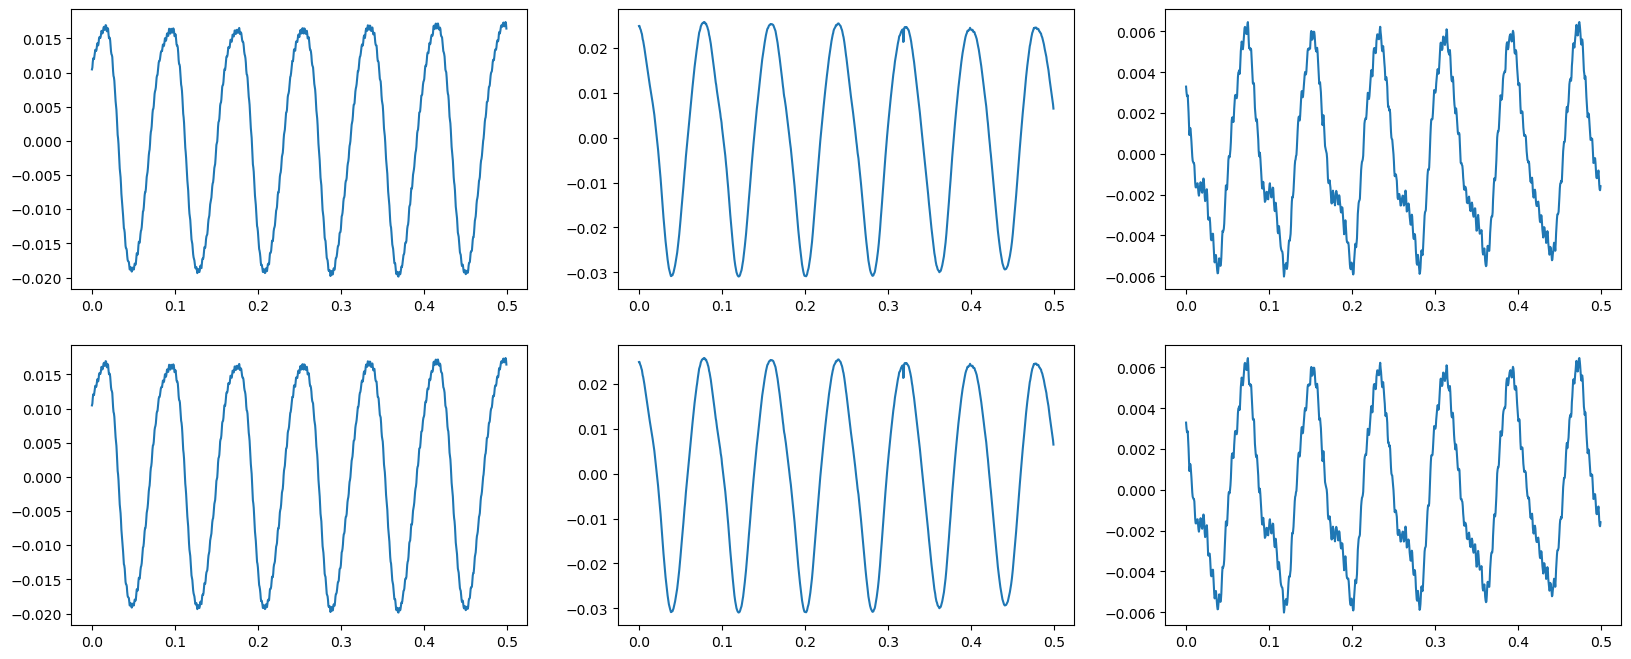

In [6]:
fig, axis = plt.subplots(2,3, figsize=(20,8))

columns = np.array([
    ['X_1 (Mean)', 'X_2 (Mean)', 'X_3 (Mean)'], 
    ['Y_1 (Mean)', 'Y_2 (Mean)', 'Y_3 (Mean)'],
    ])

for i in range(2):
    for j in range(3):
        # axis[i, j].plot(df['X_Value'][:500],df[columns[i,j]][:500])
        axis[ i,j].plot(df['X_Value'][:1000].to_list(), df[columns[1,j]][:1000].to_list())


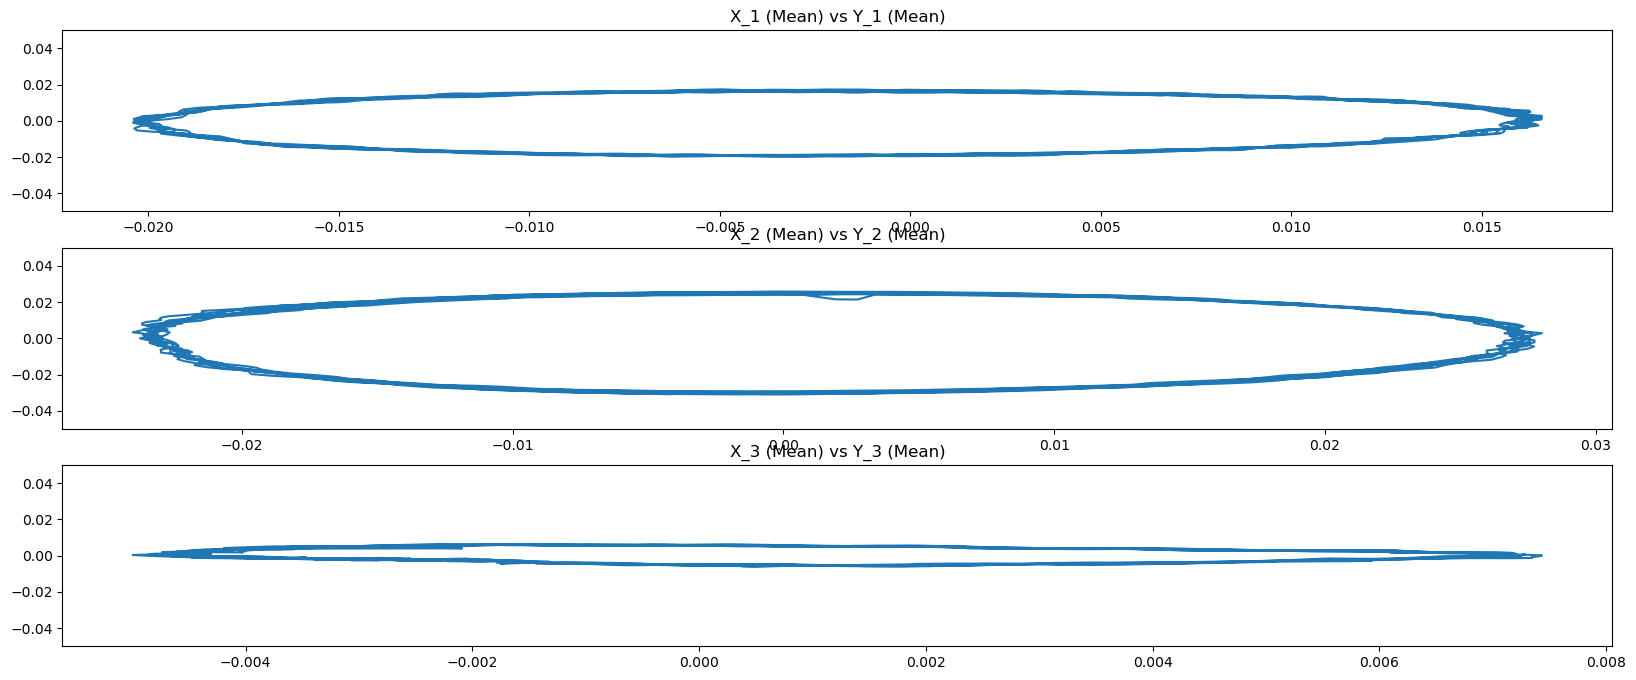

In [5]:
fig, axis = plt.subplots(3, figsize=(20,8))

columns = np.array([
    ['X_1 (Mean)', 'X_2 (Mean)', 'X_3 (Mean)'], 
    ['Y_1 (Mean)', 'Y_2 (Mean)', 'Y_3 (Mean)'],
    ])

for i in range(1):
    for j in range(3):
        # print(df[columns[0,j]][:500])
        axis[ j].plot(df[columns[0,j]][:1000].to_list(), df[columns[1,j]][:1000].to_list())
        axis[j].set_title(f'{columns[0,j]} vs {columns[1,j]}')
        axis[j].set_ylim([-0.05,0.05])

(40800, 8)


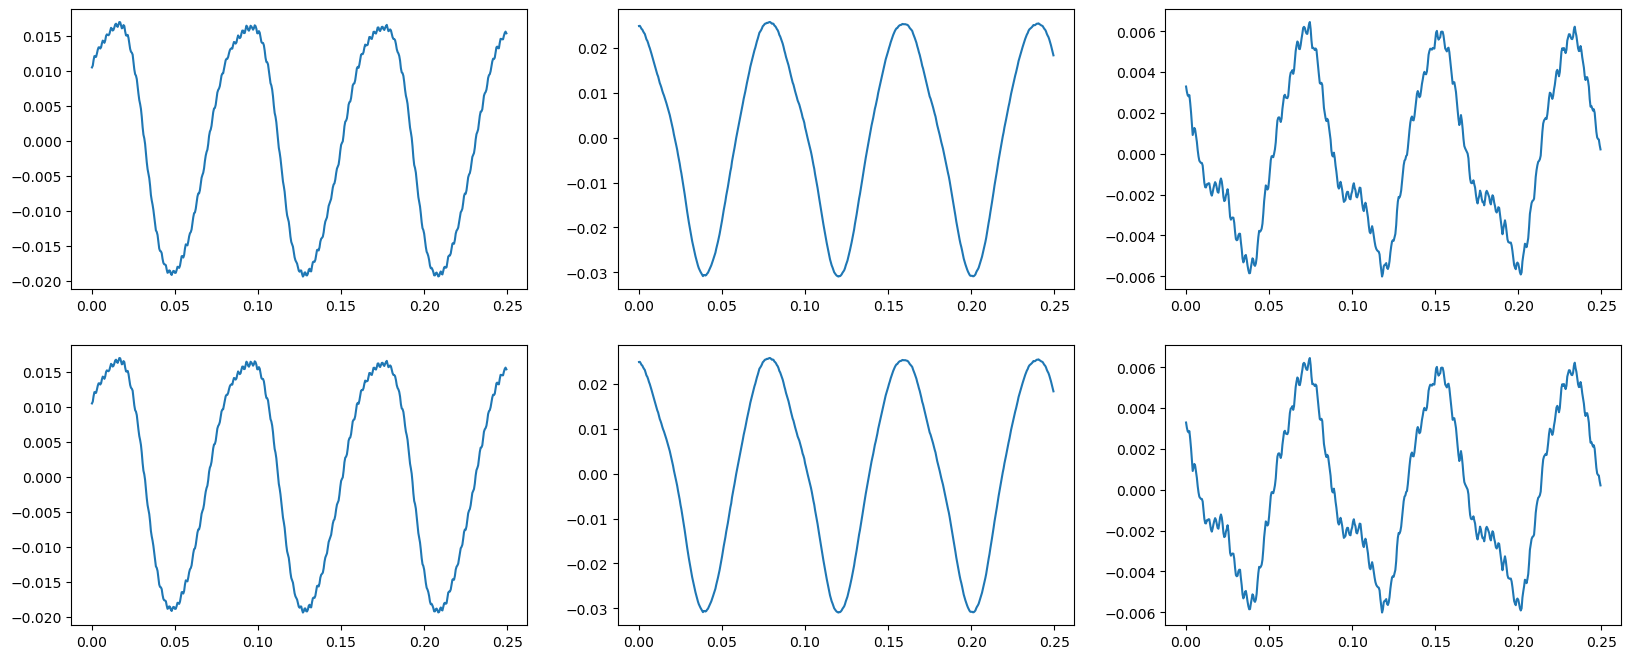

In [4]:
df = pd.read_csv('new_data/Train/with_screw/screw_1/test01_12,5hz_001.csv')
print(df.shape)

fig, axis = plt.subplots(2,3, figsize=(20,8))

columns = np.array([
    ['X_1 (Mean)', 'X_2 (Mean)', 'X_3 (Mean)'], 
    ['Y_1 (Mean)', 'Y_2 (Mean)', 'Y_3 (Mean)'],
    ])

for i in range(2):
    for j in range(3):
        # axis[i, j].plot(df['X_Value'][:500],df[columns[i,j]][:500])
        axis[ i,j].plot(df['X_Value'][:500].to_list(), df[columns[1,j]][:500].to_list())


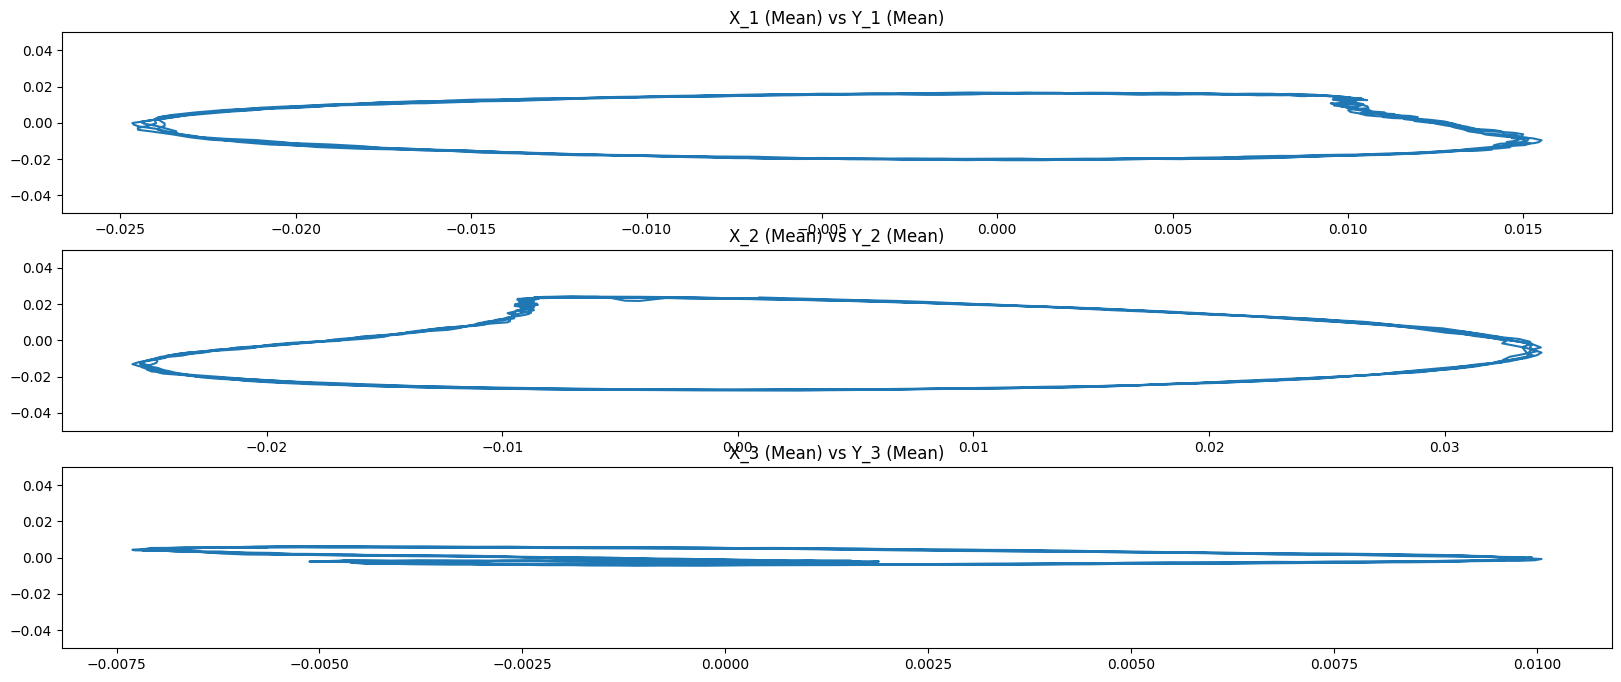

In [82]:
fig, axis = plt.subplots(3, figsize=(20,8))

columns = np.array([
    ['X_1 (Mean)', 'X_2 (Mean)', 'X_3 (Mean)'], 
    ['Y_1 (Mean)', 'Y_2 (Mean)', 'Y_3 (Mean)'],
    ])

for i in range(1):
    for j in range(3):
        # print(df[columns[0,j]][:500])
        axis[ j].plot(df[columns[0,j]][:500].to_list(), df[columns[1,j]][:500].to_list())
        axis[j].set_title(f'{columns[0,j]} vs {columns[1,j]}')
        axis[j].set_ylim([-0.05,0.05])

In [82]:
from torch.utils.data import Dataset
import pandas as pd
import os

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA (GPU) is available.")
else:
    device = torch.device("cpu")
    print("CUDA (GPU) is not available. Using CPU.")


class DigitalTwinDataset(Dataset):
    def __init__(self,root_dir, sample_length=500, device = device):
        super(DigitalTwinDataset, self).__init__()
        self.root_dir = root_dir
        self.sample_length = sample_length
        self.device = device

        self.files = self._get_files()
        self.samples = self._get_samples()

        self.data, self.labels = self._get_data()

    def _get_files(self):
        root_dir=self.root_dir
        files = {}
        no_screw_list = os.listdir(os.path.join(root_dir, 'no_screw'))
        files['no_screw'] = [os.path.join(root_dir+'no_screw', x) for x in no_screw_list]
        with_screw_folders = os.listdir(root_dir+'with_screw/')
        
        for folder in with_screw_folders:
            with_screw_list = []
            
            this_screw_list = (os.listdir(root_dir+f'with_screw/{folder}'))
            this_screw_list = [os.path.join(root_dir+f"with_screw/{folder}", x) for x in this_screw_list]
            with_screw_list =with_screw_list+this_screw_list
            files[folder] = with_screw_list

        return files

    def _get_samples(self):
        no_screw_files = self.files['no_screw']
        
        samples = {x:[] for x in self.files.keys()}
        # print(samples)

        for folder in self.files.keys():
            # print(folder)
            for files in self.files[folder]:
                # print(files)
                df = pd.read_csv(files)
                x1 = torch.tensor(df['X_1 (Mean)']).reshape(-1,1)
                y1 = torch.tensor(df['Y_1 (Mean)']).reshape(-1,1)
                x2 = torch.tensor(df['X_2 (Mean)']).reshape(-1,1)
                y2 = torch.tensor(df['Y_2 (Mean)']).reshape(-1,1)
                x3 = torch.tensor(df['X_3 (Mean)']).reshape(-1,1)
                y3 = torch.tensor(df['Y_3 (Mean)']).reshape(-1,1)
                
                data = torch.cat((x1,y1,x2,y2,x3,y3), 1)
                
                number_of_rows,_ = data.shape

                for x in range(0, number_of_rows, self.sample_length):
                    if x+self.sample_length<=number_of_rows:
                        samples[folder].append(data[x:x+self.sample_length])
            
        return samples
    
    def _get_data(self):
        data = []
        labels = []
        for label in self.samples:
            for labeled_data in self.samples[label]:
                if label=='no_screw':
                    labels.append(torch.tensor(0))
                elif label=='screw_2':
                    labels.append(torch.tensor(2))
                elif label=='screw_1':
                    labels.append(torch.tensor(1))
                else:
                    labels.append(torch.tensor(3))
                
                data.append(labeled_data)
                print(labeled_data)
                break

        return data,labels
        

        
Trainset = DigitalTwinDataset('new_data/Train/')

CUDA (GPU) is not available. Using CPU.
tensor([[-0.0047, -0.0222,  0.0163, -0.0315,  0.0062, -0.0057],
        [-0.0040, -0.0223,  0.0180, -0.0308,  0.0066, -0.0052],
        [-0.0033, -0.0218,  0.0186, -0.0297,  0.0070, -0.0048],
        ...,
        [ 0.0074, -0.0198,  0.0309, -0.0162,  0.0095, -0.0017],
        [ 0.0082, -0.0190,  0.0312, -0.0147,  0.0096, -0.0011],
        [ 0.0088, -0.0184,  0.0320, -0.0133,  0.0096, -0.0004]],
       dtype=torch.float64)
tensor([[ 0.0264, -0.0099,  0.0322, -0.0032,  0.0045, -0.0073],
        [ 0.0272, -0.0080,  0.0321, -0.0004,  0.0052, -0.0070],
        [ 0.0278, -0.0057,  0.0318,  0.0025,  0.0058, -0.0066],
        ...,
        [-0.0126,  0.0255, -0.0224,  0.0207,  0.0014,  0.0077],
        [-0.0146,  0.0241, -0.0231,  0.0189,  0.0010,  0.0080],
        [-0.0165,  0.0222, -0.0240,  0.0169,  0.0007,  0.0083]],
       dtype=torch.float64)
tensor([[-0.0136,  0.0113, -0.0181, -0.0083,  0.0001, -0.0032],
        [-0.0138,  0.0105, -0.0168, -0.0091,

In [81]:
print(torch.tensor((0)))

tensor(0)


In [85]:
print(len(Trainset.data))
print(len(Trainset.label))
for x in Trainset.data:
    print(x)

4


AttributeError: 'DigitalTwinDataset' object has no attribute 'label'